#                              Machine Leaning (Fall 2023) 
##                                  Hands on 2 - Ensemble Learning
###                                         Siavash Razmi (siavashrazmi74@gmail.com)

Ensemble learning algorithms is simply combining the predictions of two or more models.

The idea of ensemble learning is closely related to the idea of the “wisdom of crowds“. This is where many different independent decisions, choices or estimates are combined into a final outcome that is often more accurate than any single contribution.

Each of these models could be simple and inaccurate, but combined together they have the ability to output a powerful and precise prediction.

There Are Several Benefits in using Ensemble Learning:
1. **Improved predictive performance**: Ensemble models combine multiple individual models, reducing the risk of errors and enhancing accuracy by leveraging their collective wisdom.

2. **Reduction of model variance**: Ensembles stabilize predictions by averaging or combining multiple models, which mitigates the impact of individual model variations and leads to more reliable outcomes.

3. **Handling complex relationships**: Ensemble methods excel at capturing intricate patterns and nonlinear relationships within the data, making them versatile for challenging datasets.

4. **Robustness to outliers**: Ensembles are less affected by outliers as they consider the consensus of multiple models, smoothing the impact of extreme data points on predictions.

Ensembles also has a few limitations:

1. **Increased Computational Complexity**: Ensembles require more computational resources and time for training and inference, making them less suitable for real-time applications or resource-constrained environments.

2. **Reduced Model Interpretability**: The combination of multiple models can make it challenging to interpret and understand the rationale behind ensemble predictions, which may be important for some applications.

3. **Potential Overfitting**: While ensembles can reduce overfitting, if not properly configured, they may lead to overfitting when the models are too complex or highly correlated.

4. **Hyperparameter Tuning**: Ensembles often involve tuning hyperparameters for multiple models, which can be a complex and time-consuming process, especially when dealing with a large number of models in the ensemble.

### Types of Ensemble Models:

#### 1) Bagging Ensembles:
Bagging involves training multiple instances of the same model on different subsets of the training data, typically using bootstrapping (random sampling with replacement).<br>
The final prediction is often made by averaging or voting on the predictions of these models.<br>
Popular algorithms using bagging include Random Forests.<br>
1- Bagged Decision Trees<br>
2- Random Subspaces<br>
3- Random Forest<br>
4- Extra Trees<br>
5- Custom Bagging<br>

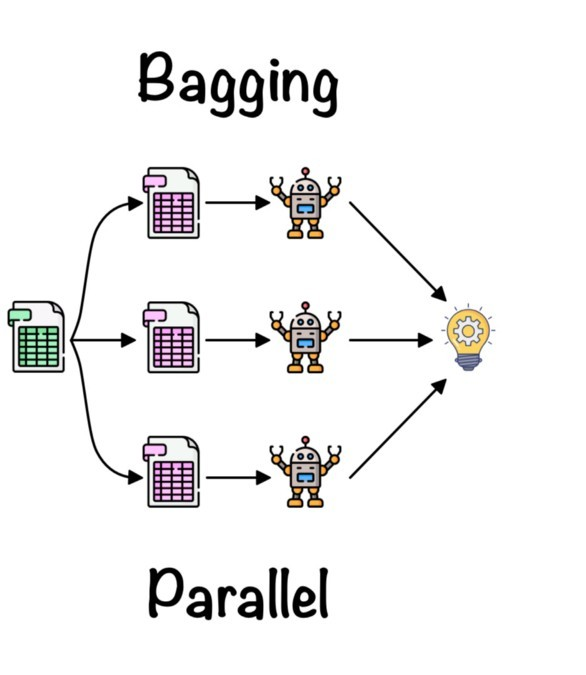

#### 2) Boosting Ensembles:
Boosting aims to correct the errors of previous models by giving more weight to misclassified data points.<br>
It trains a sequence of models, with each one focusing on the mistakes made by the previous model.<br>
Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.<br>
1- AdaBoost<br>
2- Gradient Boosting Machine<br>
3- Stochastic Gradient Boosting<br>
4- XGBoost<br>
5- LightGBM<br>

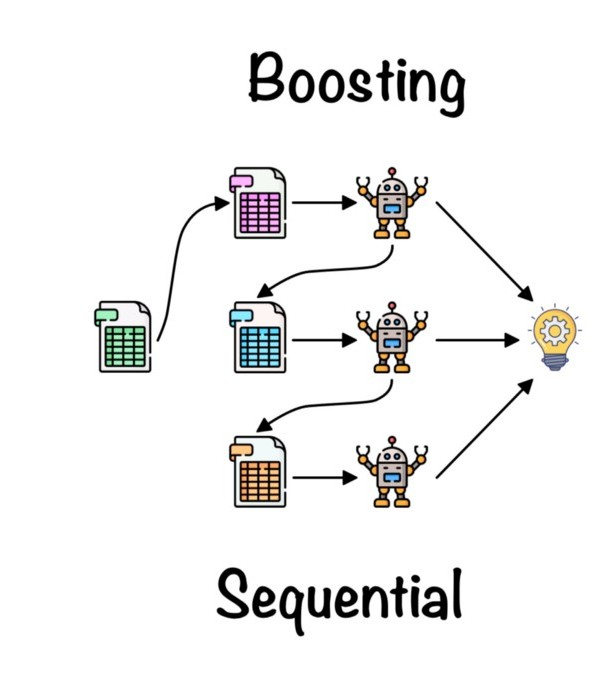

#### 3) Stacking Ensembles:
Stacking combines multiple models, typically of different types, by training a meta-model on their predictions.<br>
The base models make predictions, and the meta-model is trained to make a final prediction using these base model predictions as inputs.<br>
1- Voting<br>
2- Weighted Average<br>
3- Blending<br>
4- Stacking<br>
5- Super Learner<br>

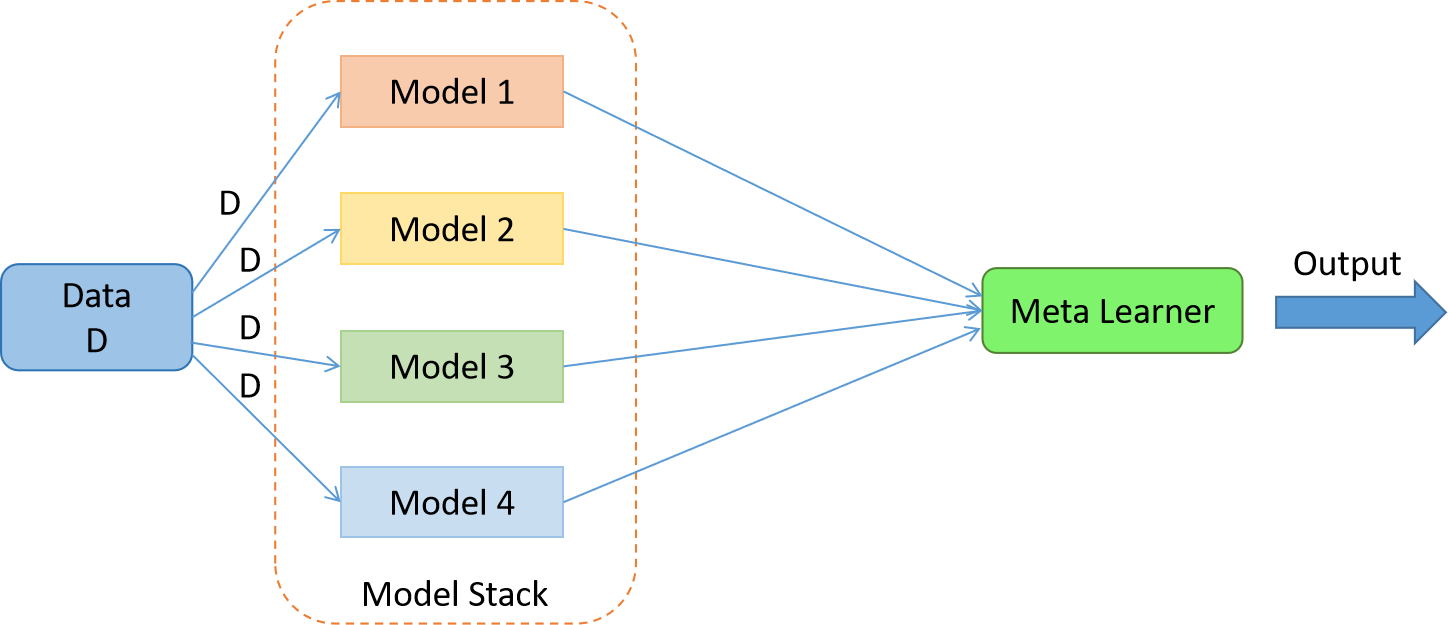

# Weak Learners:

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, 
                           n_classes=3, class_sep=1, random_state=42)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

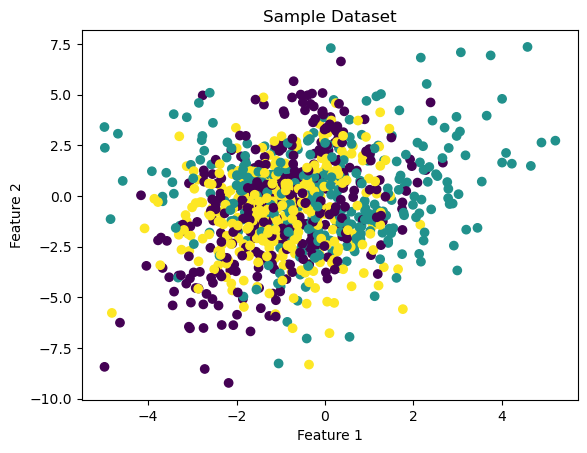

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Sample Dataset
X, y = make_classification(
    n_samples=1000,  # Number of samples
    n_features=8,    # Number of features
    n_informative=6, # Number of informative features
    n_redundant=2,   # Number of redundant features
    n_classes=3,     # Number of classes
    n_clusters_per_class=2, # Number of clusters per class
    random_state=42
)

# Plot the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Dataset')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# Create and train the weak learners
logistic_classifier = LogisticRegression(random_state=42)
decision_tree_classifier = DecisionTreeClassifier(max_depth=5,random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)

logistic_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Make predictions
logistic_pred = logistic_classifier.predict(X_test)
decision_tree_pred = decision_tree_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)

# Evaluate their performance
logistic_accuracy = accuracy_score(y_test, logistic_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print performance metrics
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("SVM Accuracy:", svm_accuracy)

# Additional details like classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))


Logistic Regression Accuracy: 0.57
Decision Tree Accuracy: 0.675
SVM Accuracy: 0.6

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.63      0.59        73
           1       0.52      0.56      0.54        59
           2       0.64      0.51      0.57        68

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.58      0.57      0.57       200

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71        73
           1       0.64      0.64      0.64        59
           2       0.63      0.72      0.67        68

    accuracy                           0.68       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.68      0.68       200

SVM Classification Report:
               precision    recall  f1-score 

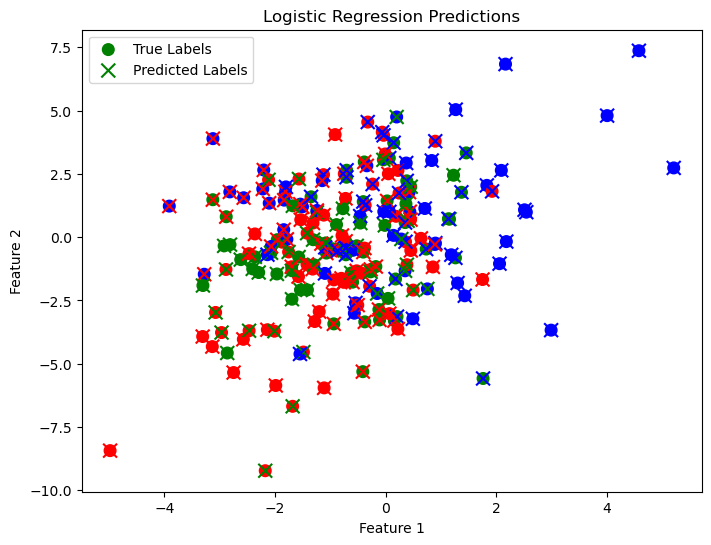

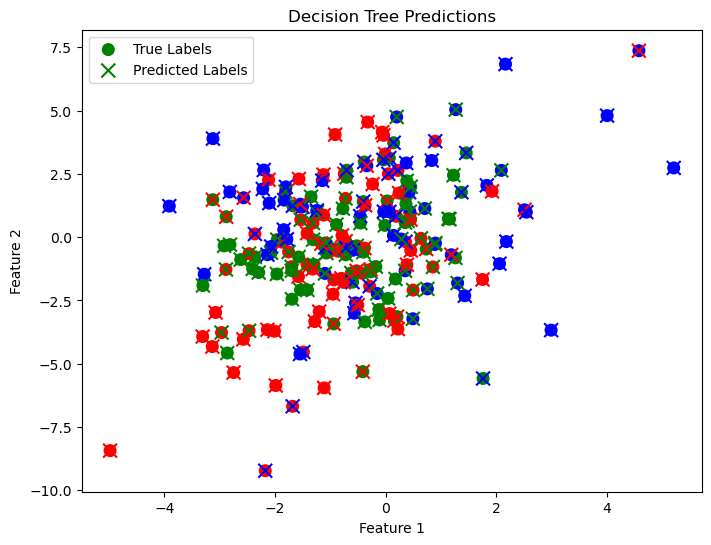

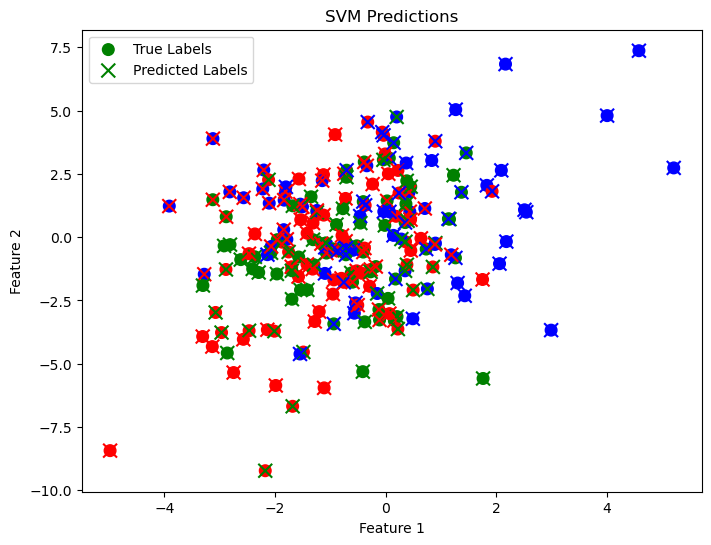

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot the predictions
def plot_predictions(X, y_true, y_pred, title):
    plt.figure(figsize=(8, 6))

    # Create a color map for the classes
    colors = np.array(['red', 'blue', 'green', 'purple'])

    # Plot the true labels
    plt.scatter(X[:, 0], X[:, 1], c=colors[y_true], marker='o',s=70, label='True Labels')

    # Plot the predicted labels
    plt.scatter(X[:, 0], X[:, 1], c=colors[y_pred], marker='x', s=100, label='Predicted Labels')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(loc='best')

# Plot predictions for Logistic Regression
plot_predictions(X_test, y_test, logistic_pred, 'Logistic Regression Predictions')
plt.show()

# Plot predictions for Decision Tree
plot_predictions(X_test, y_test, decision_tree_pred, 'Decision Tree Predictions')
plt.show()

# Plot predictions for SVM
plot_predictions(X_test, y_test, svm_pred, 'SVM Predictions')
plt.show()


# Ensemble Learning

# Bagging Classifiers:

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a BaggingClassifier with Decision Trees as base estimators
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5,random_state=42),
    n_estimators=100,  # Number of base estimators (trees)
    random_state=42
)

# Train the Bagging ensemble model
bagging_classifier.fit(X_train, y_train)

# Make predictions
bagging_pred = bagging_classifier.predict(X_test)

# Evaluate its performance
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# Print performance metrics
print("Bagging Classifier Accuracy:", bagging_accuracy)

# Additional details like a classification report
print("\nBagging Classifier Classification Report:\n", classification_report(y_test, bagging_pred))


Bagging Classifier Accuracy: 0.745

Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        73
           1       0.69      0.75      0.72        59
           2       0.75      0.69      0.72        68

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.74      0.75       200



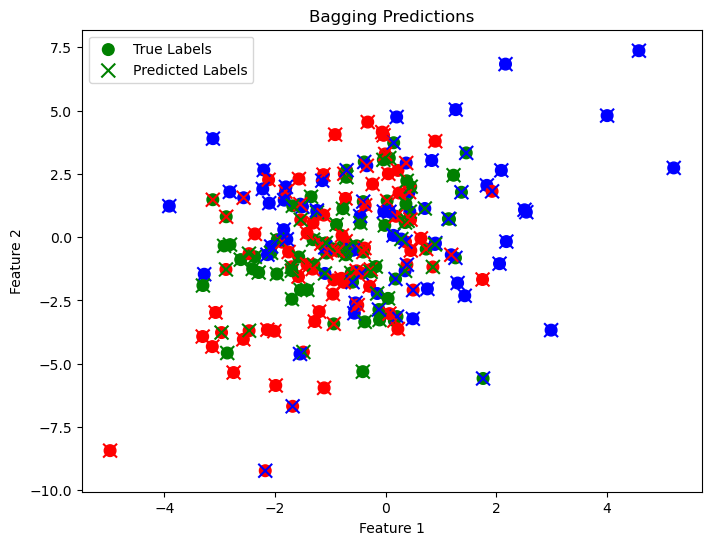

In [6]:
plot_predictions(X_test, y_test, bagging_pred, 'Bagging Predictions')
plt.show()


# Random Forest:

**Random Forest** is an ensemble learning technique that builds upon the concept of bagging (Bootstrap Aggregating) to create a more powerful and robust model for both classification and regression tasks. Here's a short description of Random Forest and how it differs from normal bagging:

1. **Random Forest:**
   - A Random Forest is an ensemble of Decision Trees, where each tree is trained on a random subset of the data and a random subset of the features.
   - The "randomness" comes from two key techniques: **bootstrap aggregating** and **feature subsampling**.
   - Each tree in the Random Forest is trained independently on a different subset of the data, and then the final prediction is made by averaging (for regression) or voting (for classification) the predictions of all trees.

2. **Differences from Normal Bagging:**
   - **Feature Subsampling:** In addition to sampling data points with replacement (bootstrapping), Random Forest also randomly selects a subset of features for each tree. This feature subsampling adds more diversity to the trees and helps reduce overfitting.
   - **Correlation Reduction:** By averaging or voting over many trees that have been trained with bootstrapping and feature subsampling, Random Forest mitigates the issue of correlation between base models in traditional bagging. This, in turn, leads to a more robust and accurate ensemble.
   
**Bootstrapping** is a resampling technique used in statistics and machine learning. It involves randomly selecting data points from a given dataset with replacement to create new datasets. This process is repeated multiple times to generate a distribution of samples. Bootstrapping helps estimate the variability of statistics, model performance, and parameter estimates by simulating the creation of multiple datasets from a single dataset, which can be useful for making inferences and building robust ensemble models like Random Forest.



Now, let's create a simple visualization using Matplotlib to demonstrate bootstrapping. We'll sample data points from a random dataset with replacement, showing how bootstrapping works:

```python

```

In this code, we create a random dataset and perform bootstrapping by sampling from it with replacement. The histogram shows how bootstrapped samples vary from the original dataset, illustrating the concept of bootstrapping in ensemble methods like bagging and Random Forest.

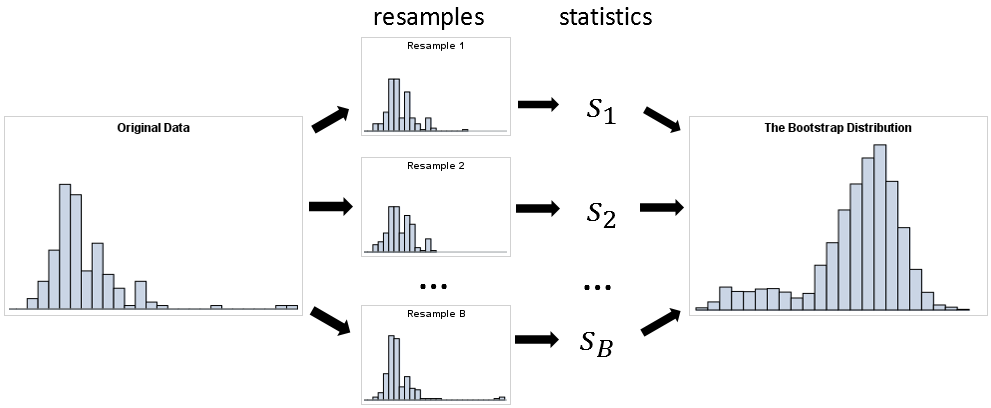

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForest model
random_forest_classifier.fit(X_train, y_train)

# Make predictions
random_forest_pred = random_forest_classifier.predict(X_test)

# Evaluate its performance
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

# Print performance metrics
print("Random Forest Accuracy:", random_forest_accuracy)

# Additional details like a classification report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, random_forest_pred))


Random Forest Accuracy: 0.86

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        73
           1       0.83      0.90      0.86        59
           2       0.93      0.78      0.85        68

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



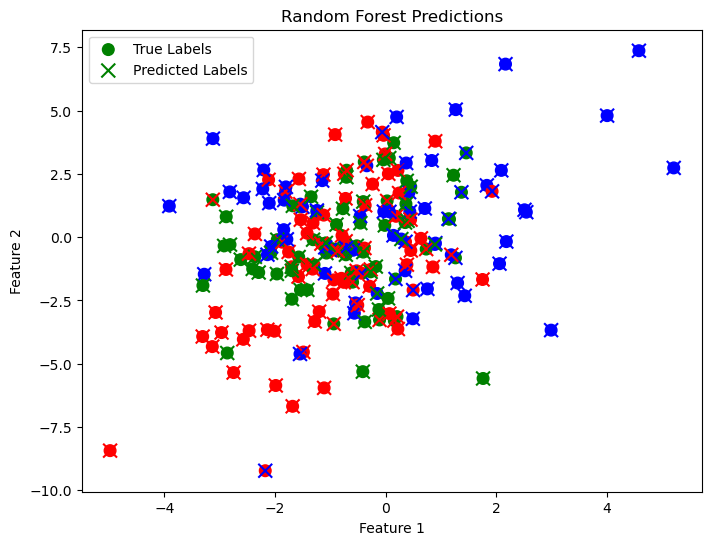

In [8]:
plot_predictions(X_test, y_test, random_forest_pred, 'Random Forest Predictions')
plt.show()


# Boosting

In [9]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier with Decision Trees as base estimators
adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,  # Number of weak learners
    random_state=42
)

# Train the AdaBoost model
adaboost_classifier.fit(X_train, y_train)

# Make predictions
adaboost_pred = adaboost_classifier.predict(X_test)

# Evaluate its performance
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)

# Print performance metrics
print("AdaBoost Accuracy:", adaboost_accuracy)

# Additional details like a classification report
print("\nAdaBoost Classification Report:\n", classification_report(y_test, adaboost_pred))


AdaBoost Accuracy: 0.7

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76        73
           1       0.63      0.66      0.64        59
           2       0.70      0.68      0.69        68

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



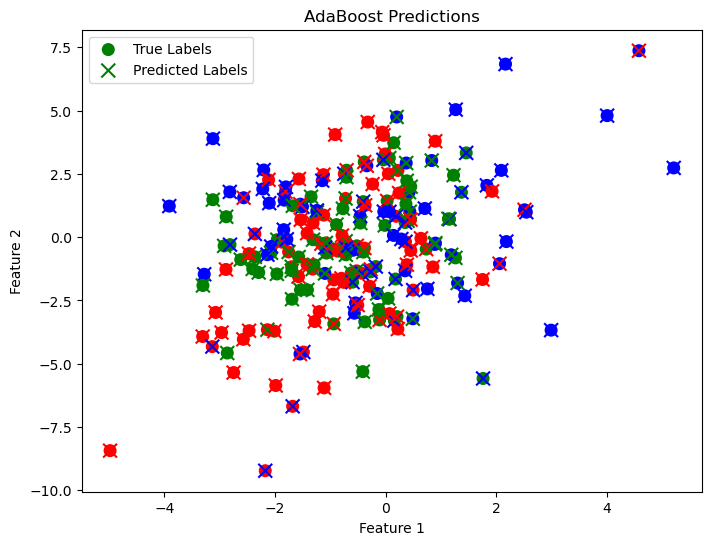

In [10]:
plot_predictions(X_test, y_test, adaboost_pred, 'AdaBoost Predictions')
plt.show()


# XGBoost and LightGBM

**XGBoost (Extreme Gradient Boosting):**
XGBoost is an ensemble learning method known for its exceptional performance and speed. It builds a strong predictive model by combining the predictions of multiple weak learners, typically decision trees. Here's a brief summary of how XGBoost works:

- **Gradient Boosting:** XGBoost uses a gradient boosting approach, where each weak learner (typically shallow decision trees) is trained to correct the errors made by the previous ones.
- **Regularization:** It includes L1 and L2 regularization terms in the objective function to control model complexity, which helps prevent overfitting.
- **Feature Importance:** XGBoost provides feature importance scores that indicate the contribution of each feature to the model's predictions.
- **Speed and Scalability:** XGBoost is designed for efficiency and can be parallelized for faster training. It has become a popular choice in machine learning competitions due to its speed and accuracy.

**LightGBM:**
LightGBM is another gradient boosting framework that is particularly known for its speed and efficiency. It works similarly to XGBoost but with some unique characteristics:

- **Histogram-Based Splitting:** LightGBM uses a histogram-based algorithm to find the best splits for decision trees. This speeds up the training process by reducing the number of data points considered for splits.
- **Leaf-Wise Growth:** LightGBM uses a leaf-wise tree growth strategy, focusing on expanding the leaves that lead to the largest gains in the loss function. This can result in more complex trees.
- **Categorical Feature Handling:** It efficiently handles categorical features without the need for one-hot encoding.
- **GPU Acceleration:** LightGBM supports GPU acceleration, making it even faster on compatible hardware.

Both XGBoost and LightGBM are powerful gradient boosting frameworks, but LightGBM's unique features make it particularly efficient and suitable for large datasets, while XGBoost remains a solid choice for a wide range of applications, offering a balance between speed and performance.

In [11]:
from xgboost import XGBClassifier 

xgb_model = XGBClassifier()

xgb_model = xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print performance metrics for XGBoost
print("XGBoost Accuracy:", xgb_accuracy)
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


XGBoost Accuracy: 0.825

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83        73
           1       0.79      0.90      0.84        59
           2       0.85      0.76      0.81        68

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.82      0.82       200



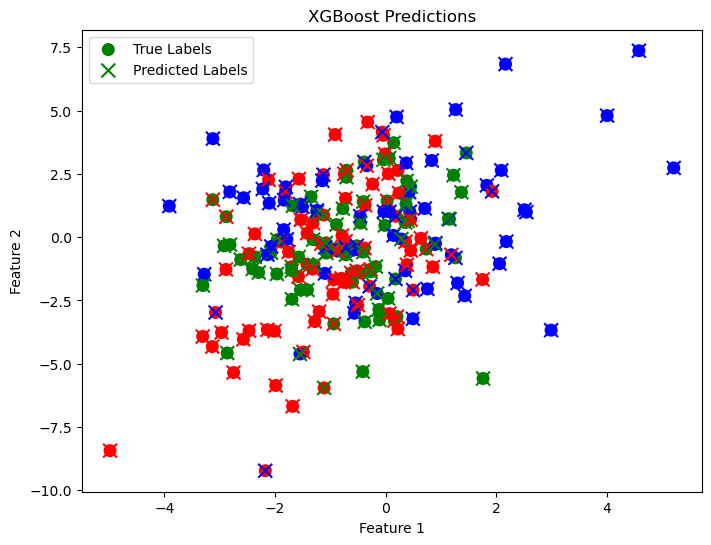

In [14]:
plot_predictions(X_test, y_test, xgb_pred, 'XGBoost Predictions')
plt.show()


In [13]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()

lgb_model = lgb_model.fit(X_train,y_train)
lgb_pred = lgb_model.predict(X_test)
# Calculate accuracy
lgb_accuracy = accuracy_score(y_test, lgb_pred)

# Print performance metrics for lgboost
print("Light GBM Accuracy:", lgb_accuracy)
print("\n Light GBM Classification Report:\n", classification_report(y_test, lgb_pred))


Light GBM Accuracy: 0.83

 Light GBM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        73
           1       0.76      0.95      0.84        59
           2       0.90      0.76      0.83        68

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200



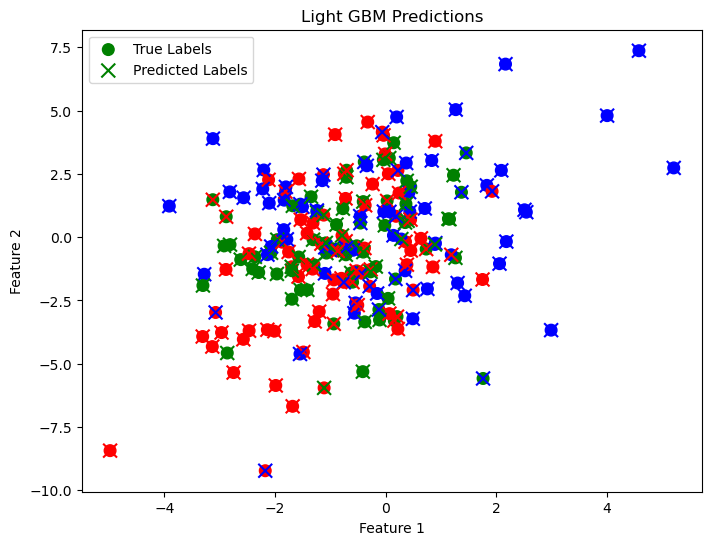

In [16]:
plot_predictions(X_test, y_test, lgb_pred, 'Light GBM Predictions')
plt.show()